In [42]:
# Multipel Linjär Regression
# Om R2 värdet inte är tillräckligt högt då är den inte linjär och då får vi ta
# till dessa knep 


$Y = X\beta + E$
där X är modellspecifikatons matrisen. E är en vektor med stokastiska...

In [43]:
import pandas as pd
import numpy as np

data_path = "../Resources/"
adv = pd.read_csv(data_path+"Advertising.csv", index_col=0)
adv.head()

import numpy as np 
Y = adv["sales"]
X = np.column_stack([np.ones(Y.shape[0]), adv["TV"], adv["radio"], adv["newspaper"]])
X
b = np.linalg.pinv(X.T @ X) @ X.T @ Y 
b

array([ 2.93888937e+00,  4.57646455e-02,  1.88530017e-01, -1.03749304e-03])

$\hat{\beta} = (X^TX)^{-1}X^{T}Y$

Beta innehåller både $\beta_0$ och $\beta_1$

$\sum^{n}_{i=1}[y_i - (b_0 + b_1+x_{1i} \cdots b_kx_{ki})^2]$


In [59]:
b = np.linalg.pinv(X.T @ X) @ X.T @ Y 
k = len(b)-1
n = Y.shape[0]
SSE = np.sum(np.square(Y - (X@b)))
# Summan  av de kvadratiska felen

var = SSE/(n-k-1)
# Stora S = sigma hat kvadrat
S = np.sqrt(var)

#SSE  felet från vårt y  till true median line

#SSR felet från vårt y till regresionlinjen
#SSR ingår i SSE

#Ett sätt att räkna ut SSR på
#SSR = (n*np.sun(b*(X.T @ Y)) - (np.square(np.sum(Y))/n
#SSR = np.sum(b*(X/T @ Y)) - (np.square(np.sum(Y))/n

Syy = np.sum(np.square(Y)) - (np.square(np.sum(Y))/n)
# Alt eftersom SSR är en del av SSE
SSR = Syy - SSE


# SSE Den rkitkga variansen
# SSR Vår gissade varians

174.4833826277272

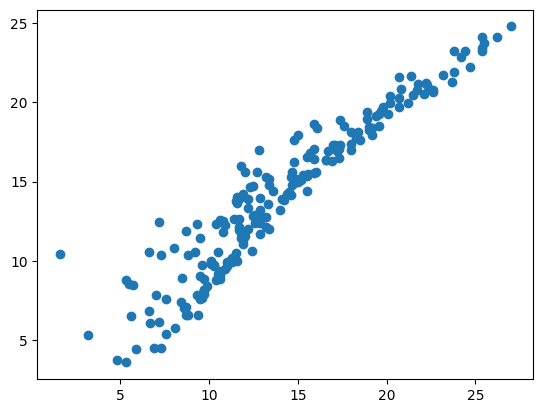

In [45]:
import matplotlib.pyplot as plt

plt.scatter(Y, X @ b)


In [46]:
b
# Vi ser att tdiningarna är negativ så jumer vi spenderar jumindre säljervi

array([ 2.93888937e+00,  4.57646455e-02,  1.88530017e-01, -1.03749304e-03])

In [47]:
Rsq = SSR/Syy

Rsq 
# Nästan 90%
# Chose 90% as confidence level

0.8972106381789521

In [48]:
import scipy.stats as stats
# Noll hypotesen = H0: All beta = 0
# SSR/k / Sigma Hat Kvadrat
sig_statistics = (SSR/k)/S 
p_significance = stats.f.sf(sig_statistics, k, n-k-1)
# Om P är högt så förklarar den inget 
# vi får e-117 så extremt låg sanolikhet att det inte skulle finnas ett sambands
# We reject the null-hypothesis, regression IS significant
p_significance
print(sig_statistics)
print(k)

961.1971866719289
3


Variance/Co-variance matrix
$$ c = (X^TX)^{-1}\sigma^2 $$

In [49]:

# Vi använder co-variancen förr att hitta parameterar som inte är relveanta 
# som vi då kan plocka bort.
# 1. Reggrison
# 2. uträkningar
# 3. relevans

# Märkligt att vi säljer mindre ju mer vi spenderar på tidningsreklam, men
# vi kan kolla den här variablen
c = np.linalg.pinv(X.T@X)*var
c

# H0: b3 is irrelevant, beta3 = 0 (hypotes)
b3_statistic = b[3] / (S*np.sqrt(c[3, 3]))
p_b3 = 2*min(stats.t.cdf(b3_statistic, n-k-1), stats.t.sf(b3_statistic, n-k-1))
p_b3
# cd och sf är värdena som ligger till höger och vänster om intervallen 
# Hade distrubutionen inte varit ex gemetriskt då hade man bara använt höger värdet(?)
# Det är 91% sannolikhet att b3 är irrelevant, det är endast felet vi ser, därför får vi 
# ett negativt värde 
# därför bör vi ta bort b3(tidningns) columnen och köra igen


p_b3

0.9166073083100381

In [50]:
# Sanity Check, check if I could remake X and Y and get the same results
BY = np.array(adv["sales"])
BX = np.array(adv[["TV","radio","newspaper"]])
BX = np.column_stack([np.ones(BY.shape[0]), BX] )  


b = np.linalg.pinv(X.T @ X) @ X.T @ Y
B = np.linalg.pinv(BX.T @ BX) @ BX.T @ BY  
print(b)
print(B)

[ 2.93888937e+00  4.57646455e-02  1.88530017e-01 -1.03749304e-03]
[ 2.93888937e+00  4.57646455e-02  1.88530017e-01 -1.03749304e-03]


In [51]:
# Train Tests Splitt
# Om två olika parametera har samma fel aka om x2 och x3 har samma värde 
# så funkar inte vår regresion metod, ovanligt fall men händer ofta i tids sereier
# Y = X\beta + E (testet som fortfarande måste stämma)
# händer också om vi råkar dubblera datan då har vi korrelation mellan feltärmerna
# aka feltärmerna måste vara okorrelerade
# så ex i advertaisen datan, om vi börja årdna den i måndasvis så kan detta hända
# då månader kan påverka försälnjingen
# Om rse varierar mycket från sample till sample då kan detta tyda på att vi har 
# det här problemet


Y = adv["sales"]
X = np.column_stack([np.ones(Y.shape[0]), adv["TV"], adv["radio"], adv["TV"]*adv["radio"]])
X
b = np.linalg.pinv(X.T @ X) @ X.T @ Y 
b

# men x_1 och x_2 är fortfarnad relevanta 

# vi kan köra alla metoder

# Detta kallas feature engineering 
# men om det inte finns någon relation mellan X och Y så kommer vi alldrig hitta något
# många som bara kör träningsdatan utan att göra en splitt, om man har tur så funkar det
# men du vet inte hur väl modeln kommer funka på okänd dtat

# litet y benämner ofta testdata
test_df = pd.DataFrame(adv[:10])
X_test = np.column_stack( [np.ones(10), test_df['TV'], test_df['radio'], test_df['TV']*test_df['radio']] ) 
Y_test = test_df['sales']

train_df = pd.DataFrame(adv[10:160])
X_train = np.column_stack( [np.ones(150), train_df['TV'], train_df['radio'], train_df['TV']*train_df['radio']] ) 
Y_train = train_df['sales']

val_df = pd.DataFrame(adv[160:200])
X_val = np.column_stack( [np.ones(40), val_df['TV'], val_df['radio'], val_df['TV']*val_df['radio']] ) 
Y_val = val_df['sales']

# vi vill plovks ut värdenat till testet random






In [52]:
b = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ Y_train 
k = len(b)-1
n = Y_train.shape[0]
SSE = np.sum(np.square(Y_train - (X_train@b)))

var = SSE/(n-k-1)
S = np.sqrt(var)


Syy = np.sum(np.square(Y)) - (np.square(np.sum(Y))/n)
SSR = Syy - SSE

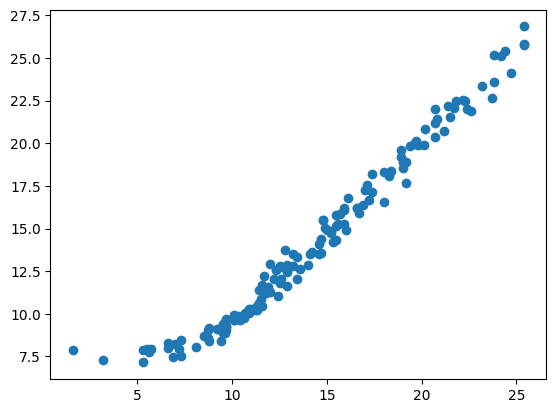

In [53]:
plt.scatter(Y_train, X_train @ b);

In [54]:
b = np.linalg.pinv(X_val.T @ X_val) @ X_val.T @ Y_val 
k = len(b)-1
n = Y_val.shape[0]
SSE = np.sum(np.square(Y_val - (X_val@b)))

var = SSE/(n-k-1)
S = np.sqrt(var)


Syy = np.sum(np.square(Y)) - (np.square(np.sum(Y))/n)
SSR = Syy - SSE
## vi får ett bättre resultat på okänd data än på träningsdatan

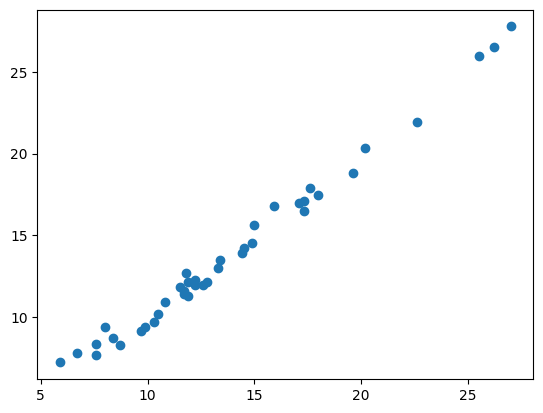

In [55]:
plt.scatter(Y_val, X_val @ b);

In [56]:
RSE = np.sqrt((1/(n-2))*SSE)
RSE
## borde bli 0.322416
## Detta värdet är +- 301 värden aka hälften av 0.603 

0.603799977921849

In [57]:

# test 
SSE_test = np.sum(np.square(Y_test - (X_test@b)))
RSE_test = np.sqrt((1/(n-2))*SSE_test)
RSE, RSE_test
# ska bli 0.322415, 0.272413

(0.603799977921849, 0.5812447961170981)